<a href="https://colab.research.google.com/github/KARTHIKSLEO31/MlMathsEx1/blob/main/Normal_Distribution_and_Z_Score__Math_and_statistics_for_data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sn

We are going to use heights dataset from kaggle.com. Dataset has heights and weights both but I have removed weights to make it simple

https://www.kaggle.com/mustafaali96/weight-height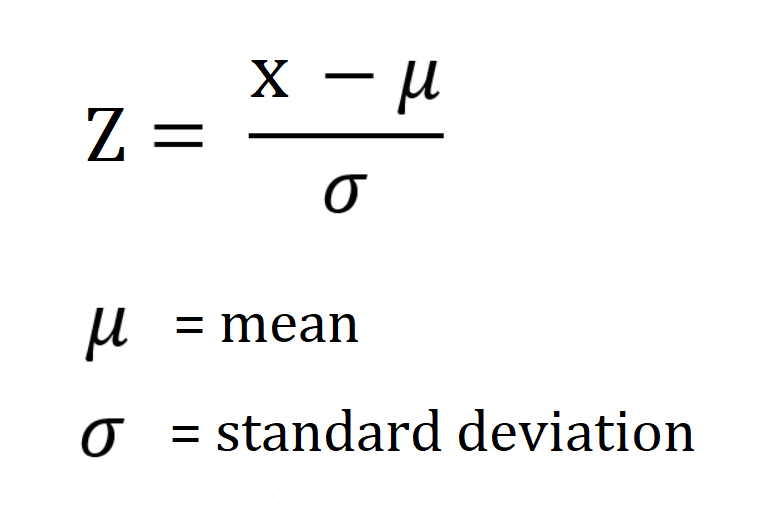

In [2]:
df = pd.read_csv("/content/teste_data/heights.csv")
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [3]:
df.height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: height, dtype: float64

<Axes: xlabel='height', ylabel='Count'>

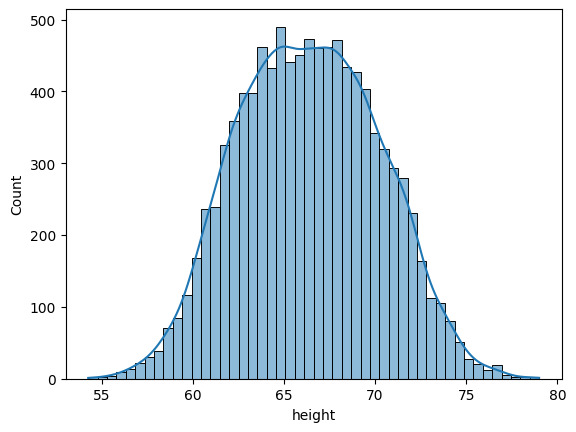

In [4]:
sn.histplot(df.height, kde=True)

In [6]:
mean = df.height.mean()
mean

66.367559754866

In [7]:
std_deviation = df.height.std()
std_deviation

3.847528120795573

In [8]:
mean-3*std_deviation

54.824975392479274

mean: This is the mean (average) of a dataset, representing the central tendency of the data.
std_deviation: This is the standard deviation of the dataset, measuring the spread or dispersion of the data points around the mean.
3 * std_deviation: This is three times the standard deviation. Multiplying the standard deviation by a factor of 3 is a common choice, and it's often used in the context of the normal distribution to capture the majority of the data.
mean - 3 * std_deviation: This expression calculates a threshold value below which data points are considered potential outliers. It is used to identify values that are significantly lower than the mean and are more than three standard deviations away from the mean.
A data point below this threshold is considered significantly lower than the mean and may be considered an outlier.
The larger the deviation from the mean (in terms of standard deviations), the more extreme the data point is considered.
It's important to note that this is a general guideline and might not be suitable for all datasets.

In [9]:
mean+3*std_deviation

77.91014411725271

mean + 3 * std_deviation:

This expression calculates a threshold value above which data points are considered potential outliers. It's based on the idea that in a normal distribution, data points beyond three standard deviations from the mean are relatively rare.
A data point above this threshold is considered significantly higher than the mean and may be considered an outlier.
The larger the deviation from the mean (in terms of standard deviations), the more extreme the data point is considered.
This upper threshold is used to identify potential outliers that are significantly higher than the mean, and it's based on the assumption that extreme values are less likely in a normal distribution.

In [10]:
df[(df.height < 54.82) | (df.height > 77.91)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


above condition checks if any value less than 54.82 then it gives an out outlier and any value greater than 77.91 then it gives an outlier .

---



In [12]:
df_no_outlier = df[(df.height<77.91) & (df.height>54.82)]
df_no_outlier.shape

(9993, 2)

(2) Outlier detection and removal using Z Score

Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is from mean.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

Calculate the Z Score

Z = (X - μ)/σ
μ = mean
σ = Standard Deviation

Let's add a new column in our dataframe for this Z score
    




In [13]:
df.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [17]:
df['zscore'] = ( df.height - df.height.mean() ) / df.height.std()
df.head(5)

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [18]:
df.height.mean()

66.367559754866

In [19]:
df.height.std()

3.847528120795573

In [20]:
(73.84-66.37)/3.84

1.9453124999999998

In [21]:
df[df['zscore']>3]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [22]:
df[df['zscore']<-3]

,gender,height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [30]:
df.zscore < -3

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: zscore, Length: 10000, dtype: bool